# Impor Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Membuat Folder

In [2]:
import shutil
import os, sys

## create folders
if not os.path.exists('data/'):
    os.makedirs('data/train_images/pre_images')
    os.makedirs('data/train_images/post_images')
    os.makedirs('data/train_images/pre_buildings')
    os.makedirs('data/train_images/post_buildings')
    os.makedirs('data/train_labels/pre_labels')
    os.makedirs('data/train_labels/post_labels')

In [3]:
import json
import pandas as pd
from pandas.io.json import json_normalize

source ='gdrive/My Drive/Data disaster/train/images/'
dest = 'data/train_images/pre_images/'
pre_tsunami_images = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'pre' in f])
for f in pre_tsunami_images:
    shutil.copy(source + f, dest)

In [4]:
source ='gdrive/My Drive/Data disaster/train/images/'
dest = 'data/train_images/post_images/'
post_tsunami_images = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'post' in f])
for f in post_tsunami_images:
    shutil.copy(source + f, dest)

In [5]:
import json
import pandas as pd
from pandas.io.json import json_normalize

source ='gdrive/My Drive/Data disaster/train/labels/'
dest = 'data/train_labels/pre_labels/'

pre_tsunami_labels = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'pre' in f])
for f in pre_tsunami_labels:
    shutil.copy(source + f, dest)

In [6]:
source ='gdrive/My Drive/Data disaster/train/labels/'
dest = 'data/train_labels/post_labels/'

post_tsunami_labels = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'post' in f])
for f in post_tsunami_labels:
    shutil.copy(source + f, dest)

# Data Exploration

In [7]:
import pandas as pd

ROOT_PATH = ''

In [8]:
import json
from pandas.io.json import json_normalize

with open (ROOT_PATH + 'data/train_labels/post_labels/palu-tsunami_00000002_post_disaster.json') as f:
    data = json.load(f)

# convert buildings json data into pandas dataframe:
buildings_raw = data['features']['xy']
buildings_df = pd.DataFrame.from_dict(json_normalize(buildings_raw), orient='columns')
buildings_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((827.1947747991766 38.05266036150195,...",building,no-damage,971e02df-cb7f-4db6-986e-a5759d37d7ee
1,"POLYGON ((923.0499820392861 35.6899999230119, ...",building,no-damage,6a02f21b-8059-4c83-bb79-ba975e738794
2,"POLYGON ((956.5165597985542 29.71629280817124,...",building,no-damage,c81fa786-4e7f-40b9-b042-fdb60ba02072
3,"POLYGON ((882.8796877291832 35.17580075222946,...",building,no-damage,0e5a70c7-1a2a-4fe5-9123-239c39424bc6
4,"POLYGON ((1007.785306028995 66.74944906072707,...",building,no-damage,a3466f3d-ca9c-4d2f-b9c2-84c074eec59d
...,...,...,...,...
316,"POLYGON ((58.5599604418947 36.33943248283705, ...",building,no-damage,53094760-b84c-4d41-809e-aeae364a9852
317,"POLYGON ((330.7137329339447 264.3348219249181,...",building,no-damage,a2587212-d3f3-4667-9b5d-5471c4eba416
318,"POLYGON ((441.7511553920975 426.538227628857, ...",building,no-damage,dcb92240-f195-4010-9bf4-2d8af4f3447f
319,"POLYGON ((416.9513452483098 883.4820980865841,...",building,destroyed,e72a7a48-b375-4901-bd91-38c0e28712b8


In [9]:
# for a single image
buildings_df['properties.subtype'].value_counts()

no-damage        273
destroyed         34
major-damage      11
un-classified      3
Name: properties.subtype, dtype: int64

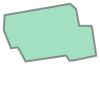

In [10]:
from shapely.geometry import Polygon
import shapely.wkt

P = shapely.wkt.loads(data['features']['xy'][0]['wkt'])
P

In [11]:
P.bounds

(789.0198001272803, 34.43021750760312, 845.709982047345, 69.81869768562817)

In [12]:
# get all files for post disaster
directory = ROOT_PATH + 'data/train_labels/post_labels/'
pattern = 'post'

post_disaster_files = [f for f in os.listdir(directory) if pattern in f]

In [13]:
# loop over post disaster data
all_json_data = []
for file in post_disaster_files:
    with open(directory + file) as f:
        data = json.load(f)
        all_json_data.append(data)

In [14]:
df = pd.DataFrame()
for curr_data in all_json_data:
    curr_building_raw = curr_data['features']['xy']
    df = df.append(json_normalize(curr_building_raw))
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((1015.149981409974 164.4699999006793,...",building,no-damage,d92b56c3-a09a-49af-a22f-33ebe9f8e95e
1,"POLYGON ((1020.839981408041 145.249999897544, ...",building,no-damage,e9e998e5-10a0-46dd-88ac-c7addb9137ae
2,"POLYGON ((1023.999981409888 126.0799998984524,...",building,no-damage,5d17d5c6-7f89-4e9a-ad9e-79c11a81233b
3,"POLYGON ((1023.999981411289 115.7699998982116,...",building,no-damage,aab7e8f4-6705-4a52-9fdf-383aa176cc7c
4,"POLYGON ((992.8083658555635 100.7870899954828,...",building,no-damage,b5d715a2-8495-4108-8a77-3bcd9b7333a9
...,...,...,...,...
109,"POLYGON ((884.5237595052421 149.2391921520348,...",building,no-damage,f385f8cf-8741-43a7-a5f0-214b888bc0b5
110,"POLYGON ((847.1004086844918 163.6417380732459,...",building,no-damage,a62e760a-b30b-446a-83e8-3bb540865849
111,"POLYGON ((817.9535013318375 154.3389990468033,...",building,no-damage,b5ab6693-d915-4eb7-afea-7f82d667709f
112,"POLYGON ((799.9845953926308 148.6014296820657,...",building,no-damage,c5a971ca-c9cc-4412-9372-4a6a18a1be17


In [15]:
### Building damages for tsunami
post_disaster_tsunami_files = [f for f in os.listdir(directory) if 'tsunami' in f]
post_disaster_tsunami_files = list(filter(lambda x: 'post' in x, post_disaster_tsunami_files))

In [16]:
tsunami_json_data = []
for file in post_disaster_tsunami_files:
    with open(directory + file) as f:
        data = json.load(f)
        tsunami_json_data.append(data)

In [17]:
df_tsunami = pd.DataFrame()
for curr_tsunami_data in tsunami_json_data:
    df_tsunami = df_tsunami.append(json_normalize(curr_tsunami_data['features']['xy']))
df_tsunami

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((1015.149981409974 164.4699999006793,...",building,no-damage,d92b56c3-a09a-49af-a22f-33ebe9f8e95e
1,"POLYGON ((1020.839981408041 145.249999897544, ...",building,no-damage,e9e998e5-10a0-46dd-88ac-c7addb9137ae
2,"POLYGON ((1023.999981409888 126.0799998984524,...",building,no-damage,5d17d5c6-7f89-4e9a-ad9e-79c11a81233b
3,"POLYGON ((1023.999981411289 115.7699998982116,...",building,no-damage,aab7e8f4-6705-4a52-9fdf-383aa176cc7c
4,"POLYGON ((992.8083658555635 100.7870899954828,...",building,no-damage,b5d715a2-8495-4108-8a77-3bcd9b7333a9
...,...,...,...,...
109,"POLYGON ((884.5237595052421 149.2391921520348,...",building,no-damage,f385f8cf-8741-43a7-a5f0-214b888bc0b5
110,"POLYGON ((847.1004086844918 163.6417380732459,...",building,no-damage,a62e760a-b30b-446a-83e8-3bb540865849
111,"POLYGON ((817.9535013318375 154.3389990468033,...",building,no-damage,b5ab6693-d915-4eb7-afea-7f82d667709f
112,"POLYGON ((799.9845953926308 148.6014296820657,...",building,no-damage,c5a971ca-c9cc-4412-9372-4a6a18a1be17


In [18]:
# for tsunami buildings:
df_tsunami['properties.subtype'].value_counts()

no-damage        25455
destroyed         4966
major-damage       571
un-classified      401
minor-damage         1
Name: properties.subtype, dtype: int64

In [19]:
from shapely.geometry import Polygon

polygon_data = []
for image_meta in tsunami_json_data:
    for building in image_meta['features']['xy']:
        polygon_data.append((building['wkt'], building['properties']['subtype']))

polygon_bounds = []
for polygon in polygon_data:
    shapely_obj = shapely.wkt.loads(polygon[0])
    poly_bound = shapely_obj.bounds
    polygon_bounds.append((poly_bound[2]-poly_bound[0], poly_bound[3]-poly_bound[1]))

#P = shapely.wkt.loads(tsunami_json_data['features']['xy'][0]['wkt'])

In [20]:
polygon_widths = [polygon[0] for polygon in polygon_bounds]
polygon_y = [polygon[1] for polygon in polygon_bounds]

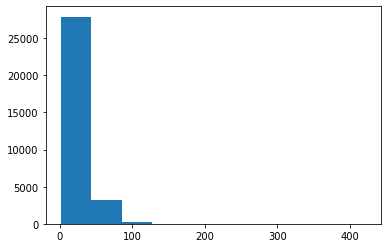

67.05647510955342

In [21]:
import matplotlib.pyplot as plt
import math
import numpy as np

poly_x_log = [math.log(polygon) for polygon in polygon_widths]
# plt.hist(poly_x_log)
plt.hist(polygon_widths)
plt.show()

#find 98 percentile
np_p_widths = np.array(polygon_widths)
crop_lim = np.percentile(np_p_widths, 98)
crop_lim #calculates the 98 percentile

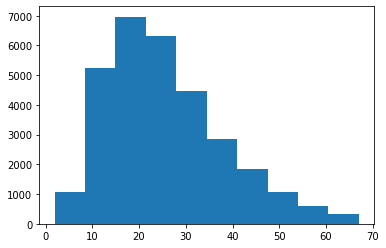

In [22]:
cropped_widths = [x for x in polygon_widths if x <= crop_lim]
plt.hist(cropped_widths)
plt.show()

In [23]:
print(len(polygon_widths))
print(len(cropped_widths))

31394
30766


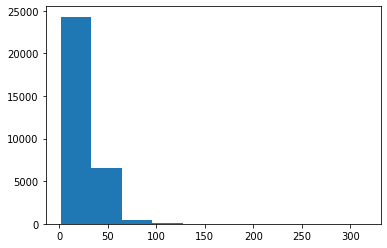

In [24]:
plt.hist(polygon_y)
plt.show()

In [25]:
cropped_y = [y for y in polygon_y if y <= 75]
print(len(polygon_y))
print(len(cropped_y))

31394
31113


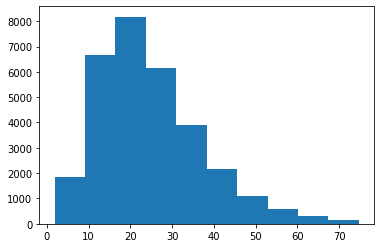

In [26]:
plt.hist(cropped_y)
plt.show()

In [27]:
# for all buildings:
df['properties.subtype'].value_counts()

no-damage        25455
destroyed         4966
major-damage       571
un-classified      401
minor-damage         1
Name: properties.subtype, dtype: int64

# Membuat Building Polygons


In [28]:
from PIL import Image, ImageDraw
import numpy
import shutil
import os
import json
from shapely.geometry import Polygon
import shapely.wkt

In [29]:
image_source = 'data/train_images/pre_images/'
dest = 'data/train_images/pre_buildings/'

pre_tsunami_images = sorted([f for f in os.listdir(image_source)])



In [30]:
def getBuildingImage(image, poly_xy, building_poly):
    imArray = numpy.asarray(image)
    
    # create mask
    maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
    ImageDraw.Draw(maskIm).polygon(poly_xy, outline=1, fill=1)
    mask = numpy.array(maskIm)
    
    # assemble new image (uint8: 0-255)
    newImArray = numpy.empty(imArray.shape,dtype='uint8')

    # colors (three first columns, RGB)
    newImArray[:,:,:3] = imArray[:,:,:3]

    # transparency (4th column)
    newImArray[:,:,3] = mask*255

    # back to Image from numpy
    newIm = Image.fromarray(newImArray, "RGBA")
    
    #crop out just the building from image
    poly_bounds = building_poly.bounds
    cropped_building_img = newIm.crop(poly_bounds)
    
    #put center of cropped image onto standarized image size
    img_w, img_h = cropped_building_img.size
    background = Image.new('RGBA', (50, 50), (255, 255, 255, 0))
    bg_w, bg_h = background.size
    offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
    background.paste(cropped_building_img, offset)
    return background

In [31]:
## get json data for this file
json_source = 'data/train_labels/pre_labels/'
pre_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

## cuts out building polygons from each image, standardrizes format, and saves images to data folder
#len(pre_tsunami_images)
for image_index in range(len(pre_tsunami_images)):
    image = Image.open(image_source + pre_tsunami_images[image_index]).convert("RGBA")
    with open (json_source + pre_tsunami_jsons[image_index]) as f:
        json_data = json.load(f)
    building_counter = 0
    for building in json_data['features']['xy']:
        building_wkt = building['wkt']
        building_poly = shapely.wkt.loads(building_wkt)
        x, y = building_poly.exterior.coords.xy
        poly_xy = [(x[i], y[i]) for i in range(len(x))]
        formatted_building_image = getBuildingImage(image, poly_xy, building_poly)
        
        building_number = str(building_counter)
        #formatting 
        while len(building_number) < 5:
            building_number = '0' + building_number
            
        formatted_building_image.save(dest + pre_tsunami_images[image_index].replace('.png', '') + '_building_' + building_number + '.png')
        building_counter += 1

In [32]:
## same thing for post images
image_source = 'data/train_images/post_images/'
dest = 'data/train_images/post_buildings/'

post_tsunami_images = sorted([f for f in os.listdir(image_source)])

## get json data for this file
json_source = 'data/train_labels/post_labels/'
post_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

## cuts out building polygons from each image, standardrizes format, and saves images to data folder
#len(pre_tsunami_images)
len(post_tsunami_images)
for image_index in range(len(post_tsunami_images)):
    image = Image.open(image_source + post_tsunami_images[image_index]).convert("RGBA")
    with open (json_source + post_tsunami_jsons[image_index]) as f:
        json_data = json.load(f)
    building_counter = 0
    for building in json_data['features']['xy']:
        building_wkt = building['wkt']
        building_poly = shapely.wkt.loads(building_wkt)
        x, y = building_poly.exterior.coords.xy
        poly_xy = [(x[i], y[i]) for i in range(len(x))]
        formatted_building_image = getBuildingImage(image, poly_xy, building_poly)
        building_number = str(building_counter)
        
        #formatting 
        while len(building_number) < 5:
            building_number = '0' + building_number
        
        formatted_building_image.save(dest + post_tsunami_images[image_index].replace('.png', '') + '_building_' + building_number + '.png')
        building_counter += 1

In [33]:
damage_labels = []
for image_json in post_tsunami_jsons:
    with open (json_source + image_json) as f:
        json_data = json.load(f)
        
    for building in json_data['features']['xy']:
        damage_labels.append(building['properties']['subtype'])

len(damage_labels)

31394

# Transfer Learning

In [34]:
import numpy as np
import json
import os
post_building_files = sorted(os.listdir('data/train_images/post_buildings'))

json_source = 'data/train_labels/post_labels/'
post_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

damage_labels = []
for image_json in post_tsunami_jsons:
    with open (json_source + image_json) as f:
        json_data = json.load(f)
        
    for building in json_data['features']['xy']:
        damage_labels.append(building['properties']['subtype'])

In [35]:
from PIL import Image

Images = []
for f in post_building_files:
    Images.append(Image.open('data/train_images/post_buildings/' + f).convert('RGB'))
    
X_post = []
for I in Images:
    X_post.append(np.asarray(I))
    
X_post = np.array(X_post)
X_post.shape

(31394, 50, 50, 3)

In [36]:
X_post_padded = [np.pad(img, ((73, 74), (73, 74), (0,0)), 'constant', constant_values=(255,)) for img in X_post]

In [37]:
X_post_padded = np.array(X_post_padded)
X_post_padded.shape

(31394, 197, 197, 3)

# CNN model

In [38]:
import os
import numpy as np
import json

In [39]:
X = []
Y = []

pre_building_files = sorted(os.listdir('data/train_images/pre_buildings'))
post_building_files = sorted(os.listdir('data/train_images/post_buildings'))

In [40]:
json_source = 'data/train_labels/post_labels/'
post_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

damage_labels = []
for image_json in post_tsunami_jsons:
    with open (json_source + image_json) as f:
        json_data = json.load(f)
        
    for building in json_data['features']['xy']:
        damage_labels.append(building['properties']['subtype'])

In [41]:
from PIL import Image

Images = []
for f in pre_building_files:
    Images.append(Image.open('data/train_images/pre_buildings/' + f).convert('RGB'))

In [42]:
X_pre = []
for I in Images:
    X_pre.append(np.asarray(I))

In [43]:
X_pre = np.array(X_pre)
X_pre.shape

(31394, 50, 50, 3)

In [44]:
Images = []
for f in post_building_files:
    Images.append(Image.open('data/train_images/post_buildings/' + f).convert('RGB'))

In [45]:
X_post = []
for I in Images:
    X_post.append(np.asarray(I))

In [46]:
X_post = np.array(X_post)
X_post.shape

(31394, 50, 50, 3)

In [47]:
X = np.concatenate((X_pre, X_post), axis=3)
X.shape

(31394, 50, 50, 6)

In [48]:
len(damage_labels)

31394

In [49]:
label_map = {'no-damage': 0, 'minor-damage': 1, 'major-damage': 2, 'destroyed': 3, 'un-classified': 4}

for label in damage_labels:
    Y.append(label_map[label])

In [50]:
train_X = X.astype('float32')[:int(0.8*len(X))]
test_X = X.astype('float32')[int(0.8*len(X)):]
train_Y = Y[0:int(0.8*len(Y))]
test_Y = Y[int(0.8*len(Y)):]

In [51]:
print(test_Y.count(0))
print(test_Y.count(1))
print(test_Y.count(2))
print(test_Y.count(3))
print(test_Y.count(4))

4592
0
134
1519
34


In [52]:
# train_X = X.astype('float32')
# train_X /= 255

# train_Y = Y

# train_X.shape

train_X /= 255
test_X /= 255

train_X.shape

(25115, 50, 50, 6)

In [54]:
#Mengkomputasi kelas bobotnya
from sklearn.utils.class_weight import compute_class_weight
print(np.unique(train_Y,return_counts=True))

cw = compute_class_weight("balanced",np.unique(train_Y),train_Y)
print(cw)

(array([0, 1, 2, 3, 4]), array([20863,     1,   437,  3447,   367]))
[2.40761156e-01 5.02300000e+03 1.14942792e+01 1.45720917e+00
 1.36866485e+01]


In [57]:
import tensorflow as tf
import pandas as pd
from sklearn import svm, datasets
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation, Reshape
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.constraints import max_norm
from keras import layers




In [58]:
model = Sequential([
    layers.Conv2D(16,(3,3),name="conv1",input_shape=(50,50,6),activation="relu",padding="same"),   
    layers.MaxPool2D((2,2),name="pool1"),
    #layers.Dropout(0.05),
    layers.Conv2D(32,(3,3),name="conv2",padding="same"),
    layers.Activation("relu"),
    layers.MaxPool2D((2,2),name="pool2"),
    #layers.Dropout(0.05),
    layers.Conv2D(32,(3,3),name="conv3",padding="same"),
    layers.Activation("relu"),
    layers.MaxPool2D((2,2),name="pool3"),
    #layers.Dropout(0.05),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(32,activation="relu"),
    layers.Dense(1),
    layers.Activation("sigmoid",name="prediction")
]
)

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 50, 50, 16)        880       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 25, 25, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 25, 25, 32)        4640      
_________________________________________________________________
activation (Activation)      (None, 25, 25, 32)        0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 12, 12, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 32)        0

In [59]:
from keras.callbacks import EarlyStopping
train_X=np.array(train_X)
train_Y=np.array(train_Y)
batch_size = 64
EPOCHS = 20

# test the network:
history=model.fit(train_X, train_Y, batch_size=batch_size, epochs=EPOCHS, validation_split=0.25, verbose=1, shuffle=True)

Epoch 1/20
295/295 [==============================] - 3s 9ms/step - loss: -3.3489 - acc: 0.2916 - val_loss: 4.9946 - val_acc: 0.5622
Epoch 2/20
295/295 [==============================] - 2s 7ms/step - loss: -10.4429 - acc: 0.2900 - val_loss: 4.3365 - val_acc: 0.3300
Epoch 3/20
295/295 [==============================] - 2s 7ms/step - loss: -306.3788 - acc: 0.3219 - val_loss: 1823.5562 - val_acc: 0.1916
Epoch 4/20
295/295 [==============================] - 2s 7ms/step - loss: -46800.2266 - acc: 0.3444 - val_loss: 130282.2812 - val_acc: 0.3048
Epoch 5/20
295/295 [==============================] - 2s 7ms/step - loss: -533306.6875 - acc: 0.3440 - val_loss: 895712.0000 - val_acc: 0.2188
Epoch 6/20
295/295 [==============================] - 2s 7ms/step - loss: -2454947.5000 - acc: 0.3450 - val_loss: 1666017.8750 - val_acc: 0.3744
Epoch 7/20
295/295 [==============================] - 2s 7ms/step - loss: -7074291.5000 - acc: 0.3363 - val_loss: 3852092.7500 - val_acc: 0.5147
Epoch 8/20
295/295 [

In [ ]:
test_predict_Y = model.predict(test_X, batch_size=batch_size, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
test_predict_Y

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

correct_damaged = 0
correct_undamaged = 0
incorrect_damaged = 0
incorrect_undamaged = 0
for index in range(len(test_Y)):
    if int(test_Y[index]) > 0:
        if int(test_predict_Y[index]) > 0:
            correct_damaged += 1
        else:
            incorrect_damaged += 1
    else:
        if int(test_predict_Y[index]) > 0:
            incorrect_undamaged += 1
        else:
            correct_undamaged += 1

print('# of damaged buildings correctly labeled as damaged: ', correct_damaged)
print('# of damaged buildings incorrectly labeled as undamaged: ', incorrect_damaged)
print('# of undamaged buildings correctly labeled as undamaged: ', correct_undamaged)
print('# of undamaged buildings incorrectly labeled as damaged: ', incorrect_undamaged)
    
#multilabel_confusion_matrix(test_Y, test_predict_Y)

In [ ]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import History
plt.plot(history.history["accuracy"],label="Akurasi Pelatihan")
plt.plot(history.history["val_accuracy"],label="Validasi Akurasi")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="Kegagalan Pelatihan")
plt.plot(history.history["val_loss"],label="Validasi Kegagalan")
plt.legend()
plt.show()